In [35]:
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation
from scipy.special import binom
import scipy.integrate as cit
from itertools import combinations
import pandas as pd
import seaborn as sns
from scipy import stats
import os
from datetime import datetime
os.getcwd()

'/home/users/t_wand01/PycharmProjects/ChangePointsForLangevin'

In [36]:
sns.set()
safety = 0.3 # percent of data at safety margin left and right
window_size = 1000
Shift = 1
safetymargin = int(window_size*safety)

In [37]:
os.chdir("/home/users/t_wand01/PycharmProjects/ChangePointsForLangevin")
DF = pd.read_csv("TimeSeries_1D_Correlations.csv", index_col =0)
Dates = pd.to_datetime(DF.index,format ="%Y-%m-%d")

data = DF["Correlation"].to_numpy()

In [38]:
Data_Size = data.size

In [39]:
loop_range = np.arange(0, Data_Size - window_size +1, Shift)

In [40]:

composite_cp_result  = np.load('composite_cp_result_ws' + str(window_size) + '.npy')

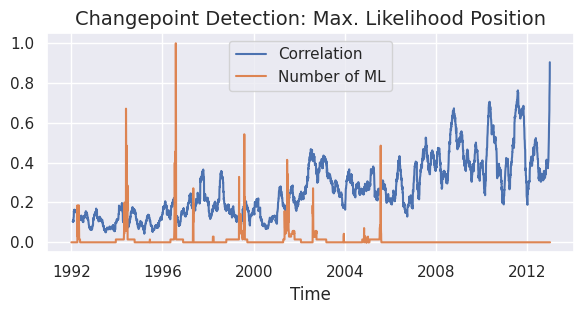

In [41]:

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates, data, label="Correlation")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")
plt.plot(Dates,composite_cp_result/max(composite_cp_result), label="Number of ML")
plt.legend()#loc= "upper right")
plt.tight_layout()

#plt.savefig('composite_cp_result_ws' + str(window_size) + '_Safety'+str(safetymargin)
#			+'_Shift'+str(window_shift) + '.pdf',bb_inches="tight", dpi=200)
plt.show()
plt.close()

In [42]:

date_time_str = '1995-12-15 00:00:00'

date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


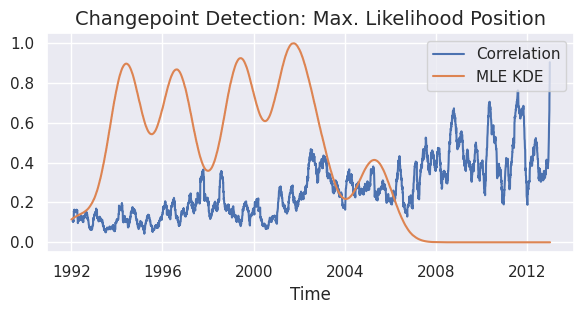

In [43]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")
plt.legend()#loc= "upper right")
plt.tight_layout()
#plt.savefig('composite_cp_result_KDE_ws' + str(window_size) + '_Safety'+str(safetymargin)
#			+'_Shift'+str(window_shift) + '.pdf',bb_inches="tight", dpi=200)
plt.show()
plt.close()

In [44]:
Dates[1000]

Timestamp('1995-12-15 00:00:00')

In [45]:
#  Stepanov's Dates

Stepanovs = list()

date_time_str = '1996-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  #From spring 1996

date_time_str = '2000-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  # until spring 2000

date_time_str = '2003-07-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  # Spring 2000 to the second half of 2003:
 
date_time_str = '2007-10-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  #From the second half of 2003 until fall of 2007

date_time_str = '2009-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj) #From October 2007 until March 2009:

In [46]:
### CAN BE JUSTIFIED VIA EMERGENCE OF STATE 7 INSTEAD OF 6
date_time_str = '2002-07-01 00:00:00'
date_time_obj_maybe = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S') # Spring 2000 to the second half of 2003:

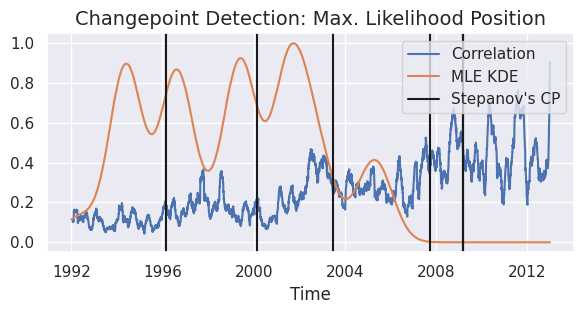

In [47]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanovs:
    plt.axvline(d, c = "k", linestyle = "-")
plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")

    
plt.axvline(date_time_obj, c = "k", linestyle = "--")

plt.legend()#loc= "upper right")
plt.tight_layout()
plt.savefig('Stepanov_Comparison_ws' + str(window_size) + '_Safety'+str(safetymargin)
            +'_Shift'+str(Shift) + '.pdf', dpi=200) #,bb_inches="tight")


plt.show()
plt.close()

In [48]:
Stepanovs[0]

datetime.datetime(1996, 3, 1, 0, 0)

## Some further stuff

In [49]:

Stepanov2 = list()

date_time_str = '1994-06-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanov2.append(date_time_obj)  # Brief appearance of state 4


date_time_str = '2005-06-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanov2.append(date_time_obj)  # re-emergence of state 5

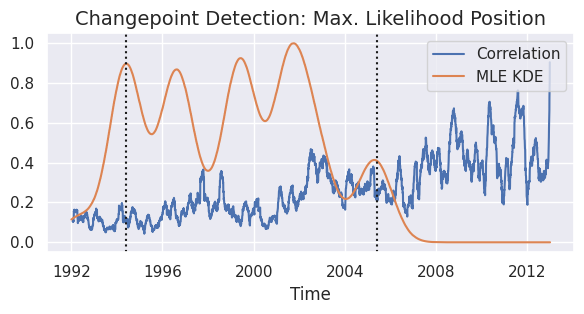

In [50]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanov2:
    plt.axvline(d, c = "k", linestyle = ":")
#plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")

 

plt.legend()#loc= "upper right")
plt.tight_layout()
#plt.savefig('Stepanov_Comparison_ws' + str(window_size) + '_Safety'+str(safetymargin)
#            +'_Shift'+str(Shift) + '.pdf',bb_inches="tight", dpi=200)


plt.show()
plt.close()

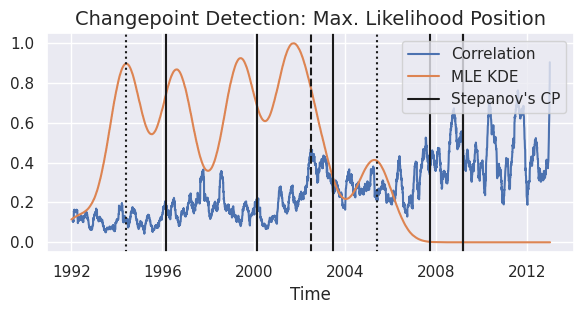

In [51]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanovs:
    plt.axvline(d, c = "k", linestyle = "-")
plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")


plt.axvline(date_time_obj_maybe, c = "k", linestyle = "--")

for d in Stepanov2:
    plt.axvline(d, c = "k", linestyle = ":")
    

plt.legend()#loc= "upper right")
plt.tight_layout()
plt.savefig('Stepanov_Comparison_(2)_ws' + str(window_size) + '_Safety'+str(safetymargin)
            +'_Shift'+str(Shift) + '.pdf',dpi = 200) #bb_inches="tight", dpi=200)


plt.show()
plt.close()

## Try to redo Stepanov's Langevin Estimation

### Start with volatility g(c)

First divide the time series c(t1), c(t2), ... into windows of length 1008 days via a sliding window of 42 days (should result in approx. 100 windows). For each of those windows, divide c-values into m bins with equal number of data points inside them. Estimate g^2(c_mean) for all c_mean mean values of each bin as a second order polynomial fit in the Kramers-Moyal framework.

In [102]:
T = 1000
Tshift = 42
numbWindows = 100
m = 10 # Number of Bins
Tau_max = 10 # How many data points for 2nd order polynomial fit

In [159]:
MeanCList = list()
GSquaredList = list()

In [103]:
C = DF["Correlation"].to_numpy()
C = C[15:] # remove NaNs at beginning
C_Windows = np.empty((numbWindows,T))

In [104]:
for i in range(numbWindows):
    c_window = C[(i*Tshift):(i*Tshift + T)]
    C_Windows[i,:] = c_window

### Beispiel: Betrachte das letzte c_window

In [114]:
Bins = np.split(np.sort(c_window), m)
print(type(Bins))
for i in range(len(Bins)):
    print(np.max(Bins[i]))

<class 'list'>
0.3041571249720732
0.3483228399632539
0.3802137002134295
0.4029243753202083
0.4443083780097266
0.4862274322622216
0.5186399880016697
0.5855865797504191
0.6520104227140345
0.7632877146912124


In [115]:
Quantiles = np.quantile(c_window, np.arange(0.1,0.91,0.1)) - 0.00001 # -0.00001 for safety margin

In [126]:
c_window_bins = np.empty(( len(c_window),2))
c_window_bins[:,0] = c_window

i = 0
for c_t in c_window:
    print(c_t, int(np.sum(c_t>Quantiles)))
    c_window_bins[i,1] = np.round(int(np.sum(c_t>Quantiles)))
    i+= 1

0.4561565734149179 5
0.4566485738555779 5
0.4596180079247299 5
0.4522845592173766 5
0.4845547469961518 5
0.4973630183199012 6
0.4958898712194092 6
0.5047557383124692 6
0.4960737311651871 6
0.5023901773606534 6
0.5078292298170106 6
0.4947692684687761 6
0.5037297054864353 6
0.4972966895479799 6
0.5415234457161258 7
0.5393560899613076 7
0.5500004929410278 7
0.5559005886191645 7
0.558069966470885 7
0.5674803709460815 7
0.5699164594736776 7
0.573247864907193 7
0.5664543855297249 7
0.5686157846654706 7
0.5670090029590726 7
0.5830906753468749 7
0.5795194127224755 7
0.5933734349786534 8
0.6013713559980411 8
0.5922739530067642 8
0.5983933892991109 8
0.6055912667326638 8
0.6070086486876696 8
0.6163373533804299 8
0.616503782605701 8
0.6224080952538349 8
0.6201850827538883 8
0.6368381466589351 8
0.633290085352701 8
0.6255420951278652 8
0.6291394375018395 8
0.6334074994971447 8
0.6345914692537169 8
0.650596734061934 8
0.6583013399971904 9
0.6599509482112987 9
0.6429109370816452 8
0.6375763513042216

In [160]:
for i in list(set(c_window_bins[:,1])):
    indices_c_ith_bin = np.arange(T)[(c_window_bins[:,1]==i)] # indices of all c-values in the current window that are in ith bin
    mean_ith_bin = np.mean(c_window[indices_c_ith_bin])
    indices_c_ith_bin = indices_c_ith_bin[indices_c_ith_bin+10 < len(c_window)] # else the computation of the difference is out of window range


    FitData = np.empty((Tau_max,2))  # used for the polynomial fit
    FitData[:,0] = np.arange(1,Tau_max+1)
    j = 0

    for delta_t in FitData[:,0]:
        indices_shift = (indices_c_ith_bin + delta_t).astype("int") # shift indices to compute mean for various tau values
        FitData[j,1] = np.mean((c_window[indices_c_ith_bin] - c_window[indices_shift])**2.) / delta_t
        j = j+1

    # squared polynomial for Kramers Moyal Estimation
    model = np.poly1d(np.polyfit(FitData[:,0], FitData[:,1], 2))

    # model(0) is the limit according to Kramers-Moyal Framework for g^2(c_mean_bin)
    #    BEWARE: Take root of model(0) to estimate g(c)
    #print(i, np.round(mean_ith_bin,2),np.round(model(0),5))
    MeanCList.append(mean_ith_bin)
    GSquaredList.append(model(0))

In [162]:
MeanCList,GSquaredList

([0.2531789203086884,
  0.328170139877885,
  0.3662104764512258,
  0.3924493267163171,
  0.4196304414657162,
  0.46399752550646534,
  0.5016927460357248,
  0.5489131227372959,
  0.6277945853997506,
  0.6831818599605323],
 [0.0001918370832334406,
  9.729616007900062e-05,
  0.00012742101612214993,
  0.00013714407565863418,
  0.00014153466846296195,
  0.00010754594007289727,
  8.931676522068979e-05,
  0.00015615092032320377,
  9.813350272964958e-05,
  9.813903487470607e-05])